# Data Loader & make NN

이렇게 데이터셋을 가져올라면 torchvision이라는 것이 깔려 있어야 한다.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

import numpy as np


In [2]:
import torchvision
import torchvision.transforms as transforms
# 이 패키지를 바로 사용해보자

In [3]:
# 이미지를 가져오면 이런식으로 선처리를 할거야라는 부분이다.
                                
transform = transforms.Compose([transforms.ToTensor(), # 가져온 이미지를 텐서로 바꿔주세여
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
# Compose는 선처리를 할 것들이 많을 수도 있어서 한칸에 모아주는 애들이다.


### torchvision.transforms.ToTensor
* Convert a PIL Image or numpy.ndarray to tensor.
* Converts a PIL Image or numpy.ndarray (H x W x C) in the range [0, 255] to a torch.FloatTensor of shape (C x H x W) in the range [0.0, 1.0] if the PIL Image belongs to one of the modes (L, LA, P, I, F, RGB, YCbCr, RGBA, CMYK, 1) or if the numpy.ndarray has dtype = np.uint8

PIL 이미지가 HWC인데 CHW형태로 바꿔준다.=> toTensor 형태로 전환 및 채널 변경도 일어난다. 그래서 저 텐서의 역할은 numpy에서 tensor로 바꿔준다. 그리고 채널의 변화를 준다. !!! 

### torchvision.transforms.Normalize(mean, std, inplace=False)
* Normalize a tensor image with mean and standard deviation. Given mean: (M1,...,Mn) and std: (S1,..,Sn) for n channels, this transform will normalize each channel of the input torch.*Tensor i.e. input[channel] = (input[channel] - mean[channel]) / std[channel]


In [4]:
# Example
# '''
# >>> transforms.Compose([
# >>>     transforms.CenterCrop(10), 이건 이미지가 있을 때 가운데 중앙으로부터 잘라내는 것이다.
# >>>     transforms.ToTensor(),
# >>> ])
# 

In [5]:
trainset = torchvision.datasets.CIFAR10(root='/data',
                                        train=True,
                                        download=True, # 다운로드할거
                                        transform=transform)

testset = torchvision.datasets.CIFAR10(root='./data',
                                       train=False,
                                       download=True,
                                       transform=transform)

Files already downloaded and verified
Files already downloaded and verified


# 토치 비전이 데이터셋을 쉽게 끌고 오기 위한 도구인데 이렇게 쉽게 끌고왔다.

### CLASS torchvision.datasets.MNIST(root, train=True, transform=None, target_transform=None, download=False)
## -> transform은 그래서 선처리다!!
## MNIST Dataset.

* Parameters:	
* root (string) – Root directory of dataset where MNIST/processed/training.pt and MNIST/processed/test.pt exist. => 어느디렉토리 저장할거냐
* train (bool, optional) – If True, creates dataset from training.pt, otherwise from test.pt. 트레인 데이터 쓸건지에 대한 내용
* download (bool, optional) – If true, downloads the dataset from the internet and puts it in root directory. If dataset is already * * downloaded, it is not downloaded again.
* transform (callable, optional) – A function/transform that takes in an PIL image and returns a transformed version. E.g, transforms.RandomCrop => 여기 트랜스폼에 이전에 선언한 트랜스폼을 넣는다.
* target_transform (callable, optional) – A function/transform that takes in the target and transforms it.

### 이제 방금전에 만든 trainset과 testset을 데이터로더에 선언한 예로 감싸보자

In [6]:
trainloader = DataLoader(trainset,
                         batch_size=8,
                         shuffle=True, # 무작위로 섞음
                         num_workers=2) # 배치 사이즈가 커지면 이미지 가지고 오는 게 시간 많음 그래서 이미지 가져올 떄 시피유 프로세스 몇개 쓰겠니?
testloader = DataLoader(testset, batch_size=8,
                        shuffle=False,
                        num_workers=2)  # 그래서 배치사이즈 클수록 num_workers는 큰게 좋다.

# 그래서 이렇게 만들면 batch_size -> 8 
# 8x3(칼라)x32x32 이렇게 인풋으로 들어간다. 

In [7]:
# 시파 10의 클래스
classes = ('plane',
           'car',
           'bird',
           'cat',
           'deer',
           'dog',
           'frog',
           'horse',
           'ship',
           'truck')

In [8]:
def imshow(img):
    img = img / 2 + 0.5 # 이전에 한 normalize를 unnormalize를 한다.
    np_img = img.numpy() # 텐서니까 numpy로 바꿔서 저장시키면 
    plt.imshow(np.transpose(np_img, (1,2,0))) # 애는 PIL이미 형식으로 다시 변환하는 것
                # " HxWxC <- CxHxW 이렇게 "
    print(np_img.shape)
    print((np.transpose(np_img, (1,2,0))).shape)

In [9]:
dataiter=iter(trainloader) 
#=> dataloader로 감싸놓은 애를 iter라고 함수를 써서 감쌌다.
images, labels = dataiter.next()
# dataiter.next()찍어서 이미지와 라벨 가져온다.
# 이렇게 쓰기도 하는데

In [10]:
# 이 방법도 쓰기도 한다.
# 이미지와 라벨을 몇번째 뿌려주는지 보여준다. 
# 8x3x32x32를 6250개를 던져준다.
# trainloader를 enumerate로 가져온다. 
for n, (img, labels) in enumerate(trainloader):
    print(n, img.shape, labels.shape)
    

0 torch.Size([8, 3, 32, 32]) torch.Size([8])
1 torch.Size([8, 3, 32, 32]) torch.Size([8])
2 torch.Size([8, 3, 32, 32]) torch.Size([8])
3 torch.Size([8, 3, 32, 32]) torch.Size([8])
4 torch.Size([8, 3, 32, 32]) torch.Size([8])
5 torch.Size([8, 3, 32, 32]) torch.Size([8])
6 torch.Size([8, 3, 32, 32]) torch.Size([8])
7 torch.Size([8, 3, 32, 32]) torch.Size([8])
8 torch.Size([8, 3, 32, 32]) torch.Size([8])
9 torch.Size([8, 3, 32, 32]) torch.Size([8])
10 torch.Size([8, 3, 32, 32]) torch.Size([8])
11 torch.Size([8, 3, 32, 32]) torch.Size([8])
12 torch.Size([8, 3, 32, 32]) torch.Size([8])
13 torch.Size([8, 3, 32, 32]) torch.Size([8])
14 torch.Size([8, 3, 32, 32]) torch.Size([8])
15 torch.Size([8, 3, 32, 32]) torch.Size([8])
16 torch.Size([8, 3, 32, 32]) torch.Size([8])
17 torch.Size([8, 3, 32, 32]) torch.Size([8])
18 torch.Size([8, 3, 32, 32]) torch.Size([8])
19 torch.Size([8, 3, 32, 32]) torch.Size([8])
20 torch.Size([8, 3, 32, 32]) torch.Size([8])
21 torch.Size([8, 3, 32, 32]) torch.Size([8]

373 torch.Size([8, 3, 32, 32]) torch.Size([8])
374 torch.Size([8, 3, 32, 32]) torch.Size([8])
375 torch.Size([8, 3, 32, 32]) torch.Size([8])
376 torch.Size([8, 3, 32, 32]) torch.Size([8])
377 torch.Size([8, 3, 32, 32]) torch.Size([8])
378 torch.Size([8, 3, 32, 32]) torch.Size([8])
379 torch.Size([8, 3, 32, 32]) torch.Size([8])
380 torch.Size([8, 3, 32, 32]) torch.Size([8])
381 torch.Size([8, 3, 32, 32]) torch.Size([8])
382 torch.Size([8, 3, 32, 32]) torch.Size([8])
383 torch.Size([8, 3, 32, 32]) torch.Size([8])
384 torch.Size([8, 3, 32, 32]) torch.Size([8])
385 torch.Size([8, 3, 32, 32]) torch.Size([8])
386 torch.Size([8, 3, 32, 32]) torch.Size([8])
387 torch.Size([8, 3, 32, 32]) torch.Size([8])
388 torch.Size([8, 3, 32, 32]) torch.Size([8])
389 torch.Size([8, 3, 32, 32]) torch.Size([8])
390 torch.Size([8, 3, 32, 32]) torch.Size([8])
391 torch.Size([8, 3, 32, 32]) torch.Size([8])
392 torch.Size([8, 3, 32, 32]) torch.Size([8])
393 torch.Size([8, 3, 32, 32]) torch.Size([8])
394 torch.Siz

716 torch.Size([8, 3, 32, 32]) torch.Size([8])
717 torch.Size([8, 3, 32, 32]) torch.Size([8])
718 torch.Size([8, 3, 32, 32]) torch.Size([8])
719 torch.Size([8, 3, 32, 32]) torch.Size([8])
720 torch.Size([8, 3, 32, 32]) torch.Size([8])
721 torch.Size([8, 3, 32, 32]) torch.Size([8])
722 torch.Size([8, 3, 32, 32]) torch.Size([8])
723 torch.Size([8, 3, 32, 32]) torch.Size([8])
724 torch.Size([8, 3, 32, 32]) torch.Size([8])
725 torch.Size([8, 3, 32, 32]) torch.Size([8])
726 torch.Size([8, 3, 32, 32]) torch.Size([8])
727 torch.Size([8, 3, 32, 32]) torch.Size([8])
728 torch.Size([8, 3, 32, 32]) torch.Size([8])
729 torch.Size([8, 3, 32, 32]) torch.Size([8])
730 torch.Size([8, 3, 32, 32]) torch.Size([8])
731 torch.Size([8, 3, 32, 32]) torch.Size([8])
732 torch.Size([8, 3, 32, 32]) torch.Size([8])
733 torch.Size([8, 3, 32, 32]) torch.Size([8])
734 torch.Size([8, 3, 32, 32]) torch.Size([8])
735 torch.Size([8, 3, 32, 32]) torch.Size([8])
736 torch.Size([8, 3, 32, 32]) torch.Size([8])
737 torch.Siz

1074 torch.Size([8, 3, 32, 32]) torch.Size([8])
1075 torch.Size([8, 3, 32, 32]) torch.Size([8])
1076 torch.Size([8, 3, 32, 32]) torch.Size([8])
1077 torch.Size([8, 3, 32, 32]) torch.Size([8])
1078 torch.Size([8, 3, 32, 32]) torch.Size([8])
1079 torch.Size([8, 3, 32, 32]) torch.Size([8])
1080 torch.Size([8, 3, 32, 32]) torch.Size([8])
1081 torch.Size([8, 3, 32, 32]) torch.Size([8])
1082 torch.Size([8, 3, 32, 32]) torch.Size([8])
1083 torch.Size([8, 3, 32, 32]) torch.Size([8])
1084 torch.Size([8, 3, 32, 32]) torch.Size([8])
1085 torch.Size([8, 3, 32, 32]) torch.Size([8])
1086 torch.Size([8, 3, 32, 32]) torch.Size([8])
1087 torch.Size([8, 3, 32, 32]) torch.Size([8])
1088 torch.Size([8, 3, 32, 32]) torch.Size([8])
1089 torch.Size([8, 3, 32, 32]) torch.Size([8])
1090 torch.Size([8, 3, 32, 32]) torch.Size([8])
1091 torch.Size([8, 3, 32, 32]) torch.Size([8])
1092 torch.Size([8, 3, 32, 32]) torch.Size([8])
1093 torch.Size([8, 3, 32, 32]) torch.Size([8])
1094 torch.Size([8, 3, 32, 32]) torch.Si

1444 torch.Size([8, 3, 32, 32]) torch.Size([8])
1445 torch.Size([8, 3, 32, 32]) torch.Size([8])
1446 torch.Size([8, 3, 32, 32]) torch.Size([8])
1447 torch.Size([8, 3, 32, 32]) torch.Size([8])
1448 torch.Size([8, 3, 32, 32]) torch.Size([8])
1449 torch.Size([8, 3, 32, 32]) torch.Size([8])
1450 torch.Size([8, 3, 32, 32]) torch.Size([8])
1451 torch.Size([8, 3, 32, 32]) torch.Size([8])
1452 torch.Size([8, 3, 32, 32]) torch.Size([8])
1453 torch.Size([8, 3, 32, 32]) torch.Size([8])
1454 torch.Size([8, 3, 32, 32]) torch.Size([8])
1455 torch.Size([8, 3, 32, 32]) torch.Size([8])
1456 torch.Size([8, 3, 32, 32]) torch.Size([8])
1457 torch.Size([8, 3, 32, 32]) torch.Size([8])
1458 torch.Size([8, 3, 32, 32]) torch.Size([8])
1459 torch.Size([8, 3, 32, 32]) torch.Size([8])
1460 torch.Size([8, 3, 32, 32]) torch.Size([8])
1461 torch.Size([8, 3, 32, 32]) torch.Size([8])
1462 torch.Size([8, 3, 32, 32]) torch.Size([8])
1463 torch.Size([8, 3, 32, 32]) torch.Size([8])
1464 torch.Size([8, 3, 32, 32]) torch.Si

1802 torch.Size([8, 3, 32, 32]) torch.Size([8])
1803 torch.Size([8, 3, 32, 32]) torch.Size([8])
1804 torch.Size([8, 3, 32, 32]) torch.Size([8])
1805 torch.Size([8, 3, 32, 32]) torch.Size([8])
1806 torch.Size([8, 3, 32, 32]) torch.Size([8])
1807 torch.Size([8, 3, 32, 32]) torch.Size([8])
1808 torch.Size([8, 3, 32, 32]) torch.Size([8])
1809 torch.Size([8, 3, 32, 32]) torch.Size([8])
1810 torch.Size([8, 3, 32, 32]) torch.Size([8])
1811 torch.Size([8, 3, 32, 32]) torch.Size([8])
1812 torch.Size([8, 3, 32, 32]) torch.Size([8])
1813 torch.Size([8, 3, 32, 32]) torch.Size([8])
1814 torch.Size([8, 3, 32, 32]) torch.Size([8])
1815 torch.Size([8, 3, 32, 32]) torch.Size([8])
1816 torch.Size([8, 3, 32, 32]) torch.Size([8])
1817 torch.Size([8, 3, 32, 32]) torch.Size([8])
1818 torch.Size([8, 3, 32, 32]) torch.Size([8])
1819 torch.Size([8, 3, 32, 32]) torch.Size([8])
1820 torch.Size([8, 3, 32, 32]) torch.Size([8])
1821 torch.Size([8, 3, 32, 32]) torch.Size([8])
1822 torch.Size([8, 3, 32, 32]) torch.Si

2158 torch.Size([8, 3, 32, 32]) torch.Size([8])
2159 torch.Size([8, 3, 32, 32]) torch.Size([8])
2160 torch.Size([8, 3, 32, 32]) torch.Size([8])
2161 torch.Size([8, 3, 32, 32]) torch.Size([8])
2162 torch.Size([8, 3, 32, 32]) torch.Size([8])
2163 torch.Size([8, 3, 32, 32]) torch.Size([8])
2164 torch.Size([8, 3, 32, 32]) torch.Size([8])
2165 torch.Size([8, 3, 32, 32]) torch.Size([8])
2166 torch.Size([8, 3, 32, 32]) torch.Size([8])
2167 torch.Size([8, 3, 32, 32]) torch.Size([8])
2168 torch.Size([8, 3, 32, 32]) torch.Size([8])
2169 torch.Size([8, 3, 32, 32]) torch.Size([8])
2170 torch.Size([8, 3, 32, 32]) torch.Size([8])
2171 torch.Size([8, 3, 32, 32]) torch.Size([8])
2172 torch.Size([8, 3, 32, 32]) torch.Size([8])
2173 torch.Size([8, 3, 32, 32]) torch.Size([8])
2174 torch.Size([8, 3, 32, 32]) torch.Size([8])
2175 torch.Size([8, 3, 32, 32]) torch.Size([8])
2176 torch.Size([8, 3, 32, 32]) torch.Size([8])
2177 torch.Size([8, 3, 32, 32]) torch.Size([8])
2178 torch.Size([8, 3, 32, 32]) torch.Si

2509 torch.Size([8, 3, 32, 32]) torch.Size([8])
2510 torch.Size([8, 3, 32, 32]) torch.Size([8])
2511 torch.Size([8, 3, 32, 32]) torch.Size([8])
2512 torch.Size([8, 3, 32, 32]) torch.Size([8])
2513 torch.Size([8, 3, 32, 32]) torch.Size([8])
2514 torch.Size([8, 3, 32, 32]) torch.Size([8])
2515 torch.Size([8, 3, 32, 32]) torch.Size([8])
2516 torch.Size([8, 3, 32, 32]) torch.Size([8])
2517 torch.Size([8, 3, 32, 32]) torch.Size([8])
2518 torch.Size([8, 3, 32, 32]) torch.Size([8])
2519 torch.Size([8, 3, 32, 32]) torch.Size([8])
2520 torch.Size([8, 3, 32, 32]) torch.Size([8])
2521 torch.Size([8, 3, 32, 32]) torch.Size([8])
2522 torch.Size([8, 3, 32, 32]) torch.Size([8])
2523 torch.Size([8, 3, 32, 32]) torch.Size([8])
2524 torch.Size([8, 3, 32, 32]) torch.Size([8])
2525 torch.Size([8, 3, 32, 32]) torch.Size([8])
2526 torch.Size([8, 3, 32, 32]) torch.Size([8])
2527 torch.Size([8, 3, 32, 32]) torch.Size([8])
2528 torch.Size([8, 3, 32, 32]) torch.Size([8])
2529 torch.Size([8, 3, 32, 32]) torch.Si

2885 torch.Size([8, 3, 32, 32]) torch.Size([8])
2886 torch.Size([8, 3, 32, 32]) torch.Size([8])
2887 torch.Size([8, 3, 32, 32]) torch.Size([8])
2888 torch.Size([8, 3, 32, 32]) torch.Size([8])
2889 torch.Size([8, 3, 32, 32]) torch.Size([8])
2890 torch.Size([8, 3, 32, 32]) torch.Size([8])
2891 torch.Size([8, 3, 32, 32]) torch.Size([8])
2892 torch.Size([8, 3, 32, 32]) torch.Size([8])
2893 torch.Size([8, 3, 32, 32]) torch.Size([8])
2894 torch.Size([8, 3, 32, 32]) torch.Size([8])
2895 torch.Size([8, 3, 32, 32]) torch.Size([8])
2896 torch.Size([8, 3, 32, 32]) torch.Size([8])
2897 torch.Size([8, 3, 32, 32]) torch.Size([8])
2898 torch.Size([8, 3, 32, 32]) torch.Size([8])
2899 torch.Size([8, 3, 32, 32]) torch.Size([8])
2900 torch.Size([8, 3, 32, 32]) torch.Size([8])
2901 torch.Size([8, 3, 32, 32]) torch.Size([8])
2902 torch.Size([8, 3, 32, 32]) torch.Size([8])
2903 torch.Size([8, 3, 32, 32]) torch.Size([8])
2904 torch.Size([8, 3, 32, 32]) torch.Size([8])
2905 torch.Size([8, 3, 32, 32]) torch.Si

3255 torch.Size([8, 3, 32, 32]) torch.Size([8])
3256 torch.Size([8, 3, 32, 32]) torch.Size([8])
3257 torch.Size([8, 3, 32, 32]) torch.Size([8])
3258 torch.Size([8, 3, 32, 32]) torch.Size([8])
3259 torch.Size([8, 3, 32, 32]) torch.Size([8])
3260 torch.Size([8, 3, 32, 32]) torch.Size([8])
3261 torch.Size([8, 3, 32, 32]) torch.Size([8])
3262 torch.Size([8, 3, 32, 32]) torch.Size([8])
3263 torch.Size([8, 3, 32, 32]) torch.Size([8])
3264 torch.Size([8, 3, 32, 32]) torch.Size([8])
3265 torch.Size([8, 3, 32, 32]) torch.Size([8])
3266 torch.Size([8, 3, 32, 32]) torch.Size([8])
3267 torch.Size([8, 3, 32, 32]) torch.Size([8])
3268 torch.Size([8, 3, 32, 32]) torch.Size([8])
3269 torch.Size([8, 3, 32, 32]) torch.Size([8])
3270 torch.Size([8, 3, 32, 32]) torch.Size([8])
3271 torch.Size([8, 3, 32, 32]) torch.Size([8])
3272 torch.Size([8, 3, 32, 32]) torch.Size([8])
3273 torch.Size([8, 3, 32, 32]) torch.Size([8])
3274 torch.Size([8, 3, 32, 32]) torch.Size([8])
3275 torch.Size([8, 3, 32, 32]) torch.Si

3613 torch.Size([8, 3, 32, 32]) torch.Size([8])
3614 torch.Size([8, 3, 32, 32]) torch.Size([8])
3615 torch.Size([8, 3, 32, 32]) torch.Size([8])
3616 torch.Size([8, 3, 32, 32]) torch.Size([8])
3617 torch.Size([8, 3, 32, 32]) torch.Size([8])
3618 torch.Size([8, 3, 32, 32]) torch.Size([8])
3619 torch.Size([8, 3, 32, 32]) torch.Size([8])
3620 torch.Size([8, 3, 32, 32]) torch.Size([8])
3621 torch.Size([8, 3, 32, 32]) torch.Size([8])
3622 torch.Size([8, 3, 32, 32]) torch.Size([8])
3623 torch.Size([8, 3, 32, 32]) torch.Size([8])
3624 torch.Size([8, 3, 32, 32]) torch.Size([8])
3625 torch.Size([8, 3, 32, 32]) torch.Size([8])
3626 torch.Size([8, 3, 32, 32]) torch.Size([8])
3627 torch.Size([8, 3, 32, 32]) torch.Size([8])
3628 torch.Size([8, 3, 32, 32]) torch.Size([8])
3629 torch.Size([8, 3, 32, 32]) torch.Size([8])
3630 torch.Size([8, 3, 32, 32]) torch.Size([8])
3631 torch.Size([8, 3, 32, 32]) torch.Size([8])
3632 torch.Size([8, 3, 32, 32]) torch.Size([8])
3633 torch.Size([8, 3, 32, 32]) torch.Si

3977 torch.Size([8, 3, 32, 32]) torch.Size([8])
3978 torch.Size([8, 3, 32, 32]) torch.Size([8])
3979 torch.Size([8, 3, 32, 32]) torch.Size([8])
3980 torch.Size([8, 3, 32, 32]) torch.Size([8])
3981 torch.Size([8, 3, 32, 32]) torch.Size([8])
3982 torch.Size([8, 3, 32, 32]) torch.Size([8])
3983 torch.Size([8, 3, 32, 32]) torch.Size([8])
3984 torch.Size([8, 3, 32, 32]) torch.Size([8])
3985 torch.Size([8, 3, 32, 32]) torch.Size([8])
3986 torch.Size([8, 3, 32, 32]) torch.Size([8])
3987 torch.Size([8, 3, 32, 32]) torch.Size([8])
3988 torch.Size([8, 3, 32, 32]) torch.Size([8])
3989 torch.Size([8, 3, 32, 32]) torch.Size([8])
3990 torch.Size([8, 3, 32, 32]) torch.Size([8])
3991 torch.Size([8, 3, 32, 32]) torch.Size([8])
3992 torch.Size([8, 3, 32, 32]) torch.Size([8])
3993 torch.Size([8, 3, 32, 32]) torch.Size([8])
3994 torch.Size([8, 3, 32, 32]) torch.Size([8])
3995 torch.Size([8, 3, 32, 32]) torch.Size([8])
3996 torch.Size([8, 3, 32, 32]) torch.Size([8])
3997 torch.Size([8, 3, 32, 32]) torch.Si

4321 torch.Size([8, 3, 32, 32]) torch.Size([8])
4322 torch.Size([8, 3, 32, 32]) torch.Size([8])
4323 torch.Size([8, 3, 32, 32]) torch.Size([8])
4324 torch.Size([8, 3, 32, 32]) torch.Size([8])
4325 torch.Size([8, 3, 32, 32]) torch.Size([8])
4326 torch.Size([8, 3, 32, 32]) torch.Size([8])
4327 torch.Size([8, 3, 32, 32]) torch.Size([8])
4328 torch.Size([8, 3, 32, 32]) torch.Size([8])
4329 torch.Size([8, 3, 32, 32]) torch.Size([8])
4330 torch.Size([8, 3, 32, 32]) torch.Size([8])
4331 torch.Size([8, 3, 32, 32]) torch.Size([8])
4332 torch.Size([8, 3, 32, 32]) torch.Size([8])
4333 torch.Size([8, 3, 32, 32]) torch.Size([8])
4334 torch.Size([8, 3, 32, 32]) torch.Size([8])
4335 torch.Size([8, 3, 32, 32]) torch.Size([8])
4336 torch.Size([8, 3, 32, 32]) torch.Size([8])
4337 torch.Size([8, 3, 32, 32]) torch.Size([8])
4338 torch.Size([8, 3, 32, 32]) torch.Size([8])
4339 torch.Size([8, 3, 32, 32]) torch.Size([8])
4340 torch.Size([8, 3, 32, 32]) torch.Size([8])
4341 torch.Size([8, 3, 32, 32]) torch.Si

4687 torch.Size([8, 3, 32, 32]) torch.Size([8])
4688 torch.Size([8, 3, 32, 32]) torch.Size([8])
4689 torch.Size([8, 3, 32, 32]) torch.Size([8])
4690 torch.Size([8, 3, 32, 32]) torch.Size([8])
4691 torch.Size([8, 3, 32, 32]) torch.Size([8])
4692 torch.Size([8, 3, 32, 32]) torch.Size([8])
4693 torch.Size([8, 3, 32, 32]) torch.Size([8])
4694 torch.Size([8, 3, 32, 32]) torch.Size([8])
4695 torch.Size([8, 3, 32, 32]) torch.Size([8])
4696 torch.Size([8, 3, 32, 32]) torch.Size([8])
4697 torch.Size([8, 3, 32, 32]) torch.Size([8])
4698 torch.Size([8, 3, 32, 32]) torch.Size([8])
4699 torch.Size([8, 3, 32, 32]) torch.Size([8])
4700 torch.Size([8, 3, 32, 32]) torch.Size([8])
4701 torch.Size([8, 3, 32, 32]) torch.Size([8])
4702 torch.Size([8, 3, 32, 32]) torch.Size([8])
4703 torch.Size([8, 3, 32, 32]) torch.Size([8])
4704 torch.Size([8, 3, 32, 32]) torch.Size([8])
4705 torch.Size([8, 3, 32, 32]) torch.Size([8])
4706 torch.Size([8, 3, 32, 32]) torch.Size([8])
4707 torch.Size([8, 3, 32, 32]) torch.Si

5059 torch.Size([8, 3, 32, 32]) torch.Size([8])
5060 torch.Size([8, 3, 32, 32]) torch.Size([8])
5061 torch.Size([8, 3, 32, 32]) torch.Size([8])
5062 torch.Size([8, 3, 32, 32]) torch.Size([8])
5063 torch.Size([8, 3, 32, 32]) torch.Size([8])
5064 torch.Size([8, 3, 32, 32]) torch.Size([8])
5065 torch.Size([8, 3, 32, 32]) torch.Size([8])
5066 torch.Size([8, 3, 32, 32]) torch.Size([8])
5067 torch.Size([8, 3, 32, 32]) torch.Size([8])
5068 torch.Size([8, 3, 32, 32]) torch.Size([8])
5069 torch.Size([8, 3, 32, 32]) torch.Size([8])
5070 torch.Size([8, 3, 32, 32]) torch.Size([8])
5071 torch.Size([8, 3, 32, 32]) torch.Size([8])
5072 torch.Size([8, 3, 32, 32]) torch.Size([8])
5073 torch.Size([8, 3, 32, 32]) torch.Size([8])
5074 torch.Size([8, 3, 32, 32]) torch.Size([8])
5075 torch.Size([8, 3, 32, 32]) torch.Size([8])
5076 torch.Size([8, 3, 32, 32]) torch.Size([8])
5077 torch.Size([8, 3, 32, 32]) torch.Size([8])
5078 torch.Size([8, 3, 32, 32]) torch.Size([8])
5079 torch.Size([8, 3, 32, 32]) torch.Si

5410 torch.Size([8, 3, 32, 32]) torch.Size([8])
5411 torch.Size([8, 3, 32, 32]) torch.Size([8])
5412 torch.Size([8, 3, 32, 32]) torch.Size([8])
5413 torch.Size([8, 3, 32, 32]) torch.Size([8])
5414 torch.Size([8, 3, 32, 32]) torch.Size([8])
5415 torch.Size([8, 3, 32, 32]) torch.Size([8])
5416 torch.Size([8, 3, 32, 32]) torch.Size([8])
5417 torch.Size([8, 3, 32, 32]) torch.Size([8])
5418 torch.Size([8, 3, 32, 32]) torch.Size([8])
5419 torch.Size([8, 3, 32, 32]) torch.Size([8])
5420 torch.Size([8, 3, 32, 32]) torch.Size([8])
5421 torch.Size([8, 3, 32, 32]) torch.Size([8])
5422 torch.Size([8, 3, 32, 32]) torch.Size([8])
5423 torch.Size([8, 3, 32, 32]) torch.Size([8])
5424 torch.Size([8, 3, 32, 32]) torch.Size([8])
5425 torch.Size([8, 3, 32, 32]) torch.Size([8])
5426 torch.Size([8, 3, 32, 32]) torch.Size([8])
5427 torch.Size([8, 3, 32, 32]) torch.Size([8])
5428 torch.Size([8, 3, 32, 32]) torch.Size([8])
5429 torch.Size([8, 3, 32, 32]) torch.Size([8])
5430 torch.Size([8, 3, 32, 32]) torch.Si

5809 torch.Size([8, 3, 32, 32]) torch.Size([8])
5810 torch.Size([8, 3, 32, 32]) torch.Size([8])
5811 torch.Size([8, 3, 32, 32]) torch.Size([8])
5812 torch.Size([8, 3, 32, 32]) torch.Size([8])
5813 torch.Size([8, 3, 32, 32]) torch.Size([8])
5814 torch.Size([8, 3, 32, 32]) torch.Size([8])
5815 torch.Size([8, 3, 32, 32]) torch.Size([8])
5816 torch.Size([8, 3, 32, 32]) torch.Size([8])
5817 torch.Size([8, 3, 32, 32]) torch.Size([8])
5818 torch.Size([8, 3, 32, 32]) torch.Size([8])
5819 torch.Size([8, 3, 32, 32]) torch.Size([8])
5820 torch.Size([8, 3, 32, 32]) torch.Size([8])
5821 torch.Size([8, 3, 32, 32]) torch.Size([8])
5822 torch.Size([8, 3, 32, 32]) torch.Size([8])
5823 torch.Size([8, 3, 32, 32]) torch.Size([8])
5824 torch.Size([8, 3, 32, 32]) torch.Size([8])
5825 torch.Size([8, 3, 32, 32]) torch.Size([8])
5826 torch.Size([8, 3, 32, 32]) torch.Size([8])
5827 torch.Size([8, 3, 32, 32]) torch.Size([8])
5828 torch.Size([8, 3, 32, 32]) torch.Size([8])
5829 torch.Size([8, 3, 32, 32]) torch.Si

6172 torch.Size([8, 3, 32, 32]) torch.Size([8])
6173 torch.Size([8, 3, 32, 32]) torch.Size([8])
6174 torch.Size([8, 3, 32, 32]) torch.Size([8])
6175 torch.Size([8, 3, 32, 32]) torch.Size([8])
6176 torch.Size([8, 3, 32, 32]) torch.Size([8])
6177 torch.Size([8, 3, 32, 32]) torch.Size([8])
6178 torch.Size([8, 3, 32, 32]) torch.Size([8])
6179 torch.Size([8, 3, 32, 32]) torch.Size([8])
6180 torch.Size([8, 3, 32, 32]) torch.Size([8])
6181 torch.Size([8, 3, 32, 32]) torch.Size([8])
6182 torch.Size([8, 3, 32, 32]) torch.Size([8])
6183 torch.Size([8, 3, 32, 32]) torch.Size([8])
6184 torch.Size([8, 3, 32, 32]) torch.Size([8])
6185 torch.Size([8, 3, 32, 32]) torch.Size([8])
6186 torch.Size([8, 3, 32, 32]) torch.Size([8])
6187 torch.Size([8, 3, 32, 32]) torch.Size([8])
6188 torch.Size([8, 3, 32, 32]) torch.Size([8])
6189 torch.Size([8, 3, 32, 32]) torch.Size([8])
6190 torch.Size([8, 3, 32, 32]) torch.Size([8])
6191 torch.Size([8, 3, 32, 32]) torch.Size([8])
6192 torch.Size([8, 3, 32, 32]) torch.Si

In [11]:
# 이렇게 쓰면 에폭단위로 돈다.
# for epoch in range(num_of_epoch) :
#    for n, (img, labels) in enumerate(trainloader):
#        print(n, img.shape, labels.shape)
    

>>> torch.Size([6, 3, 100, 100])
(3, 206, 410)
(206, 410, 3)
> torch.Size([6, 3, 100, 100])
torch.Size([3, 104, 614])


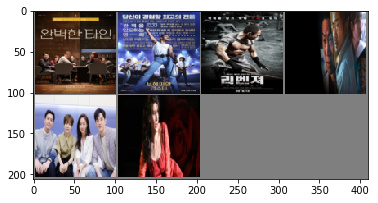

In [36]:
print(">>>",images.shape)
imshow(torchvision.utils.make_grid(images, nrow=4))
print(">",images.shape)
print((torchvision.utils.make_grid(images)).shape )
#print(''.join('%5s '%classes[labels[j]] for j in range(8)))


# 나의 커스텀 데이터셋을 불러와보자 
* mydata라는 폴더를 만들고 
* a 폴더, b폴더 c폴더로 구분

In [13]:
                        # 이미지를 100x100으로 노말라이즈한다.
                        # 텐서로 바꾼다.
trans = transforms.Compose([ transforms.Resize((100,100)),
                             transforms.ToTensor(),
                             transforms.Normalize((0.5,0.5,0.5), 
                                                  (0.5,0.5,0.5))])
trainset = torchvision.datasets.ImageFolder(root='./mydata',
                                            transform=trans)        
                                        # transform은 선처리용 트랜스

In [14]:
numofFile=len(trainset)

In [15]:
trainloader = DataLoader(trainset, batch_size =8, shuffle=False,
                         num_workers=2)

In [16]:
dataiter = iter(trainloader)
images, labels =dataiter.next()

torch.Size([6, 3, 100, 100])
(3, 206, 308)
(206, 308, 3)
torch.Size([6, 3, 100, 100])
torch.Size([3, 104, 614])
plane plane   car   car  bird  bird 


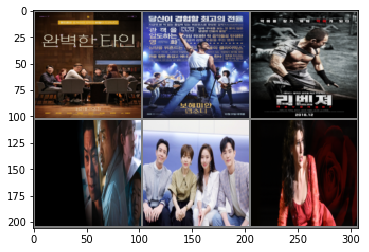

In [17]:
# 셔플을 False로 해두었으니 저렇게 순서대로 나온다.
print(images.shape)
imshow(torchvision.utils.make_grid(images, nrow=numofFile//2))
print(images.shape)
print((torchvision.utils.make_grid(images)).shape)
print(''.join('%5s '%classes[labels[j]] for j in range(numofFile)))

In [18]:
#class my_network(nn.Module):
#    def __init__(self):
#        super(my_network, self).__init__() # 그냥 외우자!!
#        
#   def forward(self,x): # 인풋이 여러개면 ,y,z,w 이렇게 넣고자 하는 변수 추가
#       (함수들을 사용하여 Network의 forward를 정의하는 장소)

# 이제 하나 만들어보자
* CIFAR-10 을 기준으로 만드니까 어떻게 만들지...?
* 먼저 CIFAR-10의 입력의 크기를 확인해야 한다.

In [19]:
# Conv2d
# CLASS torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True)[SOURCE]
# Applies a 2D convolution over an input signal composed of several input planes.

* stride=1
* padding=0
* dilation=1
* groups=1
* bias=True
* 지금은 8x3x32x32이다.
* nn.Conv2d( ) 안에다가 넣으면 댄다.
* nn.Conv2d((in_channel)3,(filter몇개쓰니?)5, (5x5 필터)5 )

In [20]:
imgs =0
for n, (imgs, labels) in enumerate(trainloader):
    print(n, img.shape, labels.shape)
    imgs=img
    break

0 torch.Size([8, 3, 32, 32]) torch.Size([6])


In [21]:
net = nn.Conv2d(3,5,5) 
# 채널 인풋,
# 채널 아웃풋,
# 쓰고자 하는 필터 크기

In [22]:
out1 = net(imgs)
print(out1.shape) # 필터가 5개니까 바뀐다.
# 32x32-4 해서 28x28

torch.Size([8, 5, 28, 28])


In [23]:
net2=nn.Conv2d(5,10,5)
out2 = net2(out1)
m = nn.AdaptiveMaxPool2d((2, 2))
print(out2.shape)
Max=m(out2)
print(Max.shape)

torch.Size([8, 10, 24, 24])
torch.Size([8, 10, 2, 2])


In [24]:
class my_network(nn.Module): # 1. 대문자
    def __init__(self):
        super(my_network, self).__init__() 
        #2. __init__ 안에 super, __init__
        self.net_1 = nn.Conv2d(3,5,5)
        self.net_2 = nn.Conv2d(5,10,5)
    def forward(self, x): # 3. 그다음에 forward를 쓰자
        x = self.net_1(x)
        x = self.net_2(x)
        return x

In [25]:
imgs = 0
for n, (img, labels) in enumerate(trainloader):
    print(n, img.shape, labels.shape)
    imgs=img
    break

0 torch.Size([6, 3, 100, 100]) torch.Size([6])


In [26]:
my_net = my_network()

In [27]:
out = my_net(imgs)
print(out.shape)

torch.Size([6, 10, 92, 92])


# Optim & Criterion
- Loss 계산 => torch.nn.다양한 Loss function
- Update(신경망을 구성하는 parameter[weight, bias 등]의 업데이트)
- => torch.optim.(다양한 optimizer)

### 여기서는 
### Loss function => CrossEntropyLoss
### Optimizer => SGD
                  
* CLASS torch.optim.SGD(params, lr=<required parameter>, momentum=0, dampening=0, weight_decay=0, nesterov=False) # params는 model.parameters() 를 넣어야 한다
* CLASS torch.nn.CrossEntropyLoss(weight=None, size_average=None, ignore_index=-100, reduce=None, reduction='mean')
    

<img src="./HowTo.PNG">
###### 내가 만든 네트워크의 파라미터와 learning rate와 momentum 이런걸 넣는다.
* 데이터를 enumerate로 받아옴
 * optim.zero_grad()를 통해 이전에 가지고 있던 파라미터를 초기화(이전에 값을 가지고 있다는 뜻 그래서 학습이 시작되기 전에 0으로 초기화한다.)
* loss = loss_function(out, labels)
 * 그리고 loss_function으로 out과 labels을 이용해서 로스를 계산해서 넣어준다.
* loss.backward()
 * backward시 자동으로 파라미터가 그라디언트를 가지게 되고 
* optim.step()
 * optim.step을 하면 자동으로 그라디언트가 업데이트가 된다.

In [28]:
class my_network(nn.Module):
    def __init__(self):
        super(my_network, self).__init__()
        self.conv1 = nn.Conv2d(3,64,5)
        self.conv2 = nn.Conv2d(64,30,5)
        self.fc1 = nn.Linear(30*5*5, 128)
        self.fc2 = nn.Linear(128,10)
        
    def forward(self, x):
        x = F.relu(self.conv1(x), inplace=True)
        x = F.max_pool2d(x,(2,2))
        x = F.relu(self.conv2(x), inplace=True)
        x = F.max_pool2d(x,(2,2))
        x = x.view(x.shape[0], -1) 
        # view는 fully connected를 집어넣을 때는 일렬인데
        # ( 배치사이즈 ,30x5x5 ) 이렇게 flatten 시켜주는 부분이다.
        x = F.relu(self.fc1(x), inplace=True)
        x = F.relu(self.fc2(x), inplace=True)
        
        return x

In [29]:
my_net = my_network()
optim = torch.optim.SGD(my_net.parameters(), lr= 0.001, momentum=0.9)
loss_function = nn.CrossEntropyLoss()



In [30]:
                                
transform = transforms.Compose([transforms.ToTensor(), # 가져온 이미지를 텐서로 바꿔주세여
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='/data',
                                        train=True,
                                        download=True, # 다운로드할거
                                        transform=transform)

testset = torchvision.datasets.CIFAR10(root='./data',
                                       train=False,
                                       download=True,
                                       transform=transform)
print("trainset shape" , trainset.shape)
print("testset shape" , testset.shape)
trainloader = DataLoader(trainset,
                         batch_size=8,
                         shuffle=True, # 무작위로 섞음
                         num_workers=2) # 배치 사이즈가 커지면 이미지 가지고 오는 게 시간 많음 그래서 이미지 가져올 떄 시피유 프로세스 몇개 쓰겠니?
testloader = DataLoader(testset, batch_size=8,
                        shuffle=False,
                        num_workers=2)  # 그래서 배치사이즈 클수록 num_workers는 큰게 좋다.


dataiter=iter(trainloader) 
#=> dataloader로 감싸놓은 애를 iter라고 함수를 써서 감쌌다.
images, labels = dataiter.next()
# dataiter.next()찍어서 이미지와 라벨 가져온다.
# 이렇게 쓰기도 하는데

Files already downloaded and verified
Files already downloaded and verified


AttributeError: 'CIFAR10' object has no attribute 'shape'

In [ ]:
# 시파 10의 클래스
classes = ('plane',
           'car',
           'bird',
           'cat',
           'deer',
           'dog',
           'frog',
           'horse',
           'ship',
           'truck')

print(">>>",images.shape)
imshow(torchvision.utils.make_grid(images, nrow=4))
print(">",images.shape)
print((torchvision.utils.make_grid(images)).shape )
print(''.join('%5s '%classes[labels[j]] for j in range(8)))

In [ ]:
epoch_num =1 
for epoch in range(epoch_num):
    for i, data in enumerate(trainloader):
        inputs, labels = data
#         inputs.requires_grad_(True)
#         labels.requires_grad_(True)
        optim.zero_grad()
        out = my_net(inputs)
        loss = loss_function(out, labels)
        loss.backward()
        optim.step()
        
        if i % 64 == 0:
            print("%d => loss : %.3f"%(i,loss))

print("train over")

In [ ]:
# trainset이라는 것은 객체인데 data라는 것을 통해 내부 값에
# 접근이 가능하다. 여기서 shape을 쓰자 그러면 모양을 알 수 있다.
# 그냥 trainset이라는 객체만 출력하면 내부의 정보 볼 수 있다.
print("trainset shape>>" , trainset.data.shape)
print("testset shape>>" , testset.data.shape)
# 즉 위의 코드는 이러한 데이터 셋을 batch로 나눈다는 것

In [ ]:
total = 0
correct = 0
for data in testloader:
    images, labels = data
    outputs = my_net(images)
    _, predicted = torch.max(outputs.data ,1) # _는 그냥 필요없는 값
    total += labels.size(0)
    correct += (predicted == labels).sum()
    # 예측값과 라벨값이 같으면 correct를 더해라
    
print("Accuracy of the network on the 10000 test images: %f"%(100*correct/total))

## Torch.max가 어떤 역할을 할까?
* 나오는 출력의 첫 번째 tensor => 값 !
* 나오는 출력의 두 번째 tensor => 인덱스

* 그래서 위는 예측값의 인덱스를 다 뽑는다.=> 그것을 labels 값과 비교한다.
* == 해서 하면 1, 0 형태로 나오는 데 그것을 sum해서 다 더해서 correct에 저장
* 이제 이걸 total로 나눈다.

In [ ]:
a= torch.rand(5,5)
print(">>>>> : ",a)
#print("====> : ",torch.max(a,-1)) # 아래와 동일
print("====> : ",torch.max(a,1))

### DataSet & Loader의 흐름
* transform=transforms.Compose으로 만들고
* trainset이라는 객체를 torchvision.datasets.(ImageFolder or CIFAR10이런 걸로 만든다. 인자는 root, transform 정도, download할거냐? train ?
* 다음 단계로 DataLoader라는 함수에다가 trainset과 batchsize, shuffle, num_worker를 등록하여 사용한다.
##### from torch.utils.data import Dataset, DataLoader

### 나의 Dataset을 편하게 불러오려면?
> DataLoader를 만들어야 한다. 그래서 첫번째 칸의 trainset을 정의
> 고러면 enumerate에다가 넣어서 배치별로 학습이 진행이 가능하다.
> 그래서 저러한 trainset의 형태는 아래와 같다. torch.utils.data.Dataset 이라는 것을 상속받는 것이다.

> class my_dataset(torch.utils.data.Dataset) <br>
>>  def \_\_init__(self, x, transforms=None):<br>
>> [내가 필요한 것들]:[데이터 셋을 가져와서 선처리를 해준다] <br>
>>  def \_\_len__(self): <br>
>> [데이터 셋의 길이를 적어준다.] <br>
>>  def \_\_getitem__(self,idx): <br>
>> [데이터 셋에서 한 개의 데이터를 가져오는 함수를 정의한다.]
### example
<img src="./Dataset.PNG">
<img src="./Dataset2.PNG">

### 위의 예제를 보고 우리만의 데이터셋 클래스를 만들자.
* self.train_data를 배열 형식으로 지정하고 있다.
* 그리고 나서 self.train_data.reshape((50000,3,32,32)) 이런식으로 불러오기 쉽게 지정한다.
* 다음줄 transpose 해서 0,2,3,1 위치로 지정하는 것
<img src="./Dataset3.PNG">
init으로 어레이 형태로 지정해놓으면 이걸 getitem으로 불러오기가 쉽다. 그리고 그 다음에는 download라는 함수가 있는데 다운로드를 하는 과정을 어떻게 하는지 나와있다.
download_url(self.url, root, self.filename, self.tgz_md5)
cwd = os.getcwd()
tar = tarfile.open(os.path.join(root, self.filename), "r:gz")
os.chdir(root)
등등

<img src="./Dataset4.PNG">

<img src="./Dataset5.PNG" width="50%">
원하는 이미지를 불러올 때 편한 방식이다. 
* torchvision에 dataset에 ImageFolder! 
이것도 동일하게 init, getitem, len 이렇게 세가지로 구성이 되어 있다.

<img src="./Dataset6.PNG">

# 결론
* 클래스를 class 이름(torch.utils.data.Dataset):
* 그리고 세가지 def init, def getitem, def len 만들자

# Network를 더 쉽게 만들기
* nn.Sequential 이다.<br>
네트워크를 쉽게 만드는 핵심이 nn.Sequential이다. 그전처럼 일일이 써주는 것은 비효율적이다.

# Model 저장하고 불러다가 다시 쓰기


In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3,32,5),
            nn.ReLU(inplace=True),
            nn.Conv2d(32,64,3),
            nn.ReLU(inplace=True),
            nn.Conv2d(64,128,3),
            nn.Conv2d(128,128,3),
            nn.ReLU(inplace=True),
            nn.Conv2d(128,256,3),
            nn.MaxPool2d(2)
        ) 
        # 이것은 한 덩어리의 레이어로 묶이게 된다.
        # stride
        # padding
        # Layer1을 통과하고
        # 세 종류의 Convolution을 하는 것이다.
        self.layer2_1 = nn.Sequential(
            nn.Conv2d(256,512,7,1,2),
            nn.Conv2d(512,64,1),
            nn.MaxPool2d(2)
        )
        
        self.layer2_2 = nn.Sequential(
            nn.Conv2d(256,512,5,1,1),
            nn.Conv2d(512,64,1),
            nn.MaxPool2d(2)
        )
        
        self.layer2_3 = nn.Sequential(
            nn.Conv2d(256,512,3),
            nn.Conv2d(512,64,1),
            nn.MaxPool2d(2)
        )
        self.fc = nn.Sequential(
            nn.Linear(3*64*4*4,1024),
            nn.ReLU(True),
            nn.Linear(1024,10)
        )
        
    def forward(self, x):
        print(x.data.shape)
        x = self.layer1(x)
        x1 = self.layer2_1(x)
        x2 = self.layer2_2(x)
        x3 = self.layer2_3(x)
        # layer1 번을 3 갈래로 통과하고 이것을 concat한다. 
        x = torch.cat((x1,x2,x3),1)
        x = x.view(x.shape[0],-1) # x => BxCxHxW 인데 이걸 펴준다.
        # 모양을 바꾸는 것이다 view는 reshape이다.
        # fully connect로 집어넣어야 해서
        x= self.fc(x)
        return x
        

In [ ]:
a=torch.rand(1,3,32,32)
print(a.shape)
print(a.shape)

In [ ]:
network = Net()
out = network(a)
print(out.shape)
# 잘 나온다 ㅎ
print(out)

In [ ]:
torch.save(network.state_dict(),'./cnn.pth')
# 네트워크의 state dict 값을 저장해주는 것이다
# 위치, 파일이름을 써주는 것이다.

In [ ]:
model = Net() # 모델이라는 동일한 아키텍처를 정의한다.
model.load_state_dict(torch.load('./cnn.pth'))
                                 # 저장해둔 state 파일을 연다.

In [ ]:
out = model(a)
print(out)

In [ ]:
print(out)